# Engagement

In this notebook we will calculate the engagement coefficient for several movies.  This is based on the model in "Social Media Engagement and Cryptocurrency Performance"  https://arxiv.org/abs/2209.02911.


Below is the overview of this notebook.


<ol type = 1>
    <li> Data processing</li>
        <ol type = a>
            <li> Add keyword columns</li>
        </ol>
    <li> Calculate engagement coefficients</li>

   <li>Plot engagement coefficients</li>

</ol>

This notebook can be opened in Colab 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/Lecture16_Engagement.ipynb)

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.

# Clones, installs, and imports


## Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [ ]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

## Install Requirements 


In [ ]:
!pip install -r -q requirements.txt


## Import Packages

In [1]:
from scripts.api import *
from scripts.TextAnalysis import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

pd.set_option("display.max_colwidth", None)

# Data Processing



In [2]:
fname_db = f"data/enagement_movies" 
df = DB.fetch(table_name='keyword_tweets', path=fname_db)
keywords = ['#AntManAndTheWasp','#JohnWick4','#ShazamFuryOfTheGods',
            '#DungeonsAndDragons','#CreedIII','#ScreamVI','#KnockattheCabin',
           '#CocaineBear']

df['keyword'] = None
for keyword in keywords:
    ind =  df.text.str.contains(keyword, case=False)
    df[f'keyword_{keyword}'] = ind
    df.loc[ind, 'keyword'] = keyword 
    print(f"{keyword}: {len(df[df[f'keyword_{keyword}']==True])} tweets ")

df['like_engagement'] = df.like_count/(df.impression_count+1)
df['retweet_engagement'] = df.retweet_count/(df.impression_count+1)
df['reply_engagement'] = df.reply_count/(df.impression_count+1)

df = df[df.like_engagement<=1]
df = df[df.retweet_engagement<=1]
df = df[df.reply_engagement<=1]

print(f"{len(df)} total tweets")



#AntManAndTheWasp: 1127 tweets 
#JohnWick4: 1137 tweets 
#ShazamFuryOfTheGods: 1197 tweets 
#DungeonsAndDragons: 1016 tweets 
#CreedIII: 1093 tweets 
#ScreamVI: 1109 tweets 
#KnockattheCabin: 1003 tweets 
#CocaineBear: 1112 tweets 
9675 total tweets


# Plot Interaction Engagements

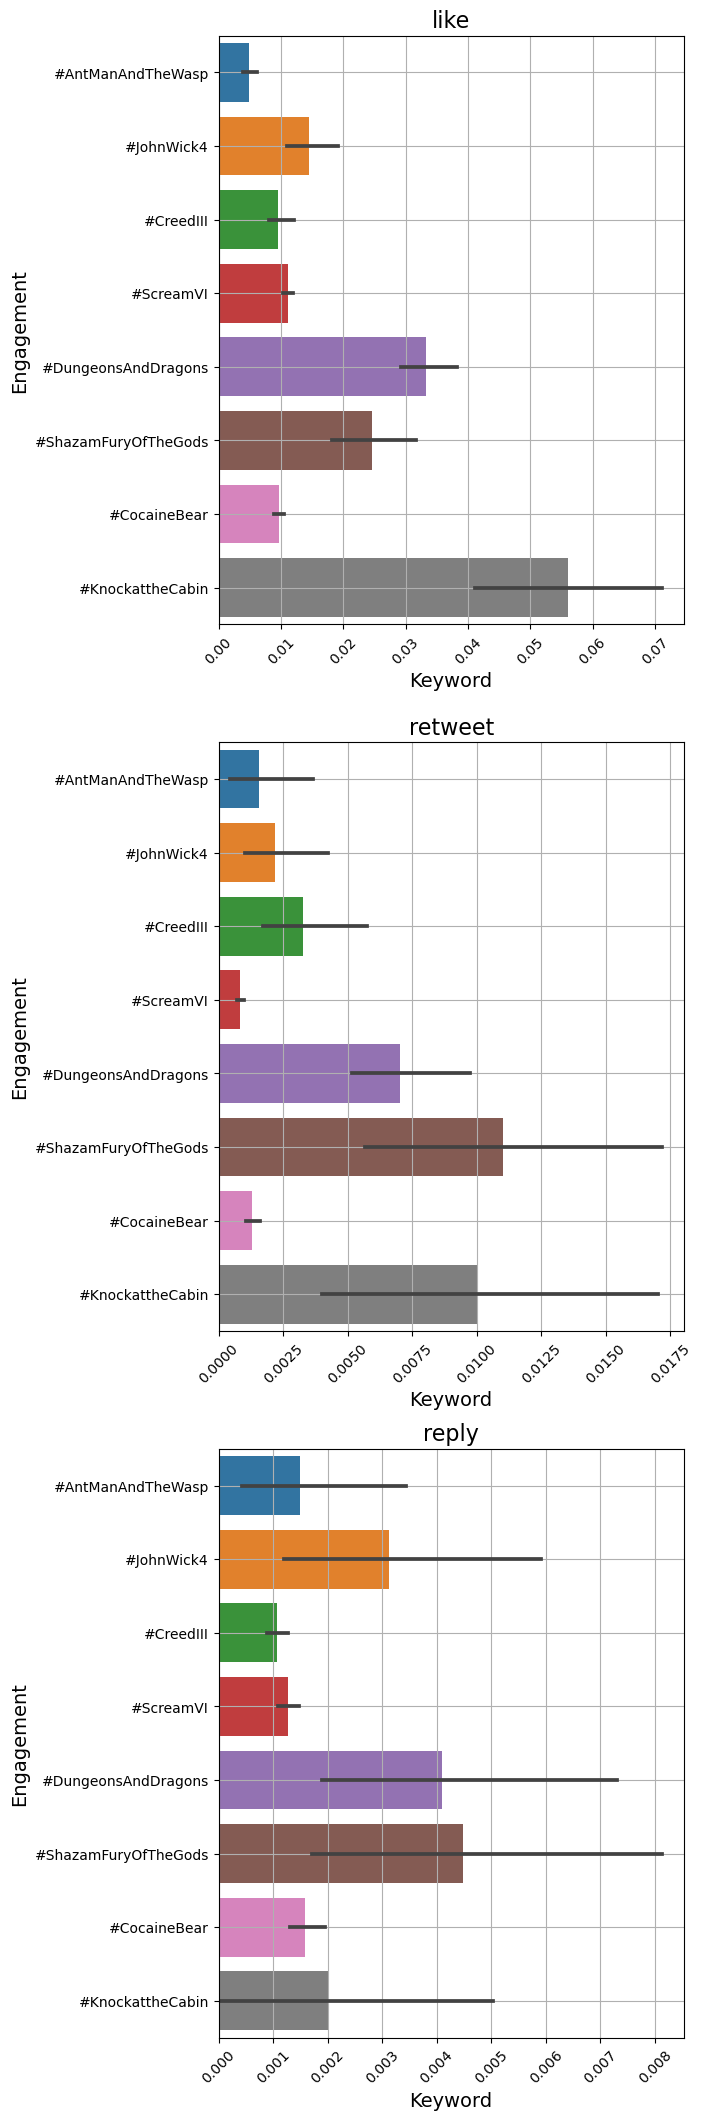

In [3]:
interactions = ['like','retweet','reply']
plt.figure(figsize = (6,26))
c= 0
for interaction in interactions:
    c+=1
    plt.subplot(3,1,c)
    ax=sns.barplot(data = df, y = 'keyword', x = f'{interaction}_engagement')
    plt.title(interaction,fontsize = 16)
    plt.grid()
    plt.ylabel(f"Engagement", fontsize = 14)
    ax.set_xlabel(f"Keyword", fontsize = 14, rotation=0)
    plt.xticks(rotation=45)

plt.show()

# Calculate Engagements and Interaction Strenghts

In [4]:
df_alpha, df_beta = engagement_estimate(df)

# Plot Engagement Coefficients (Alpha)

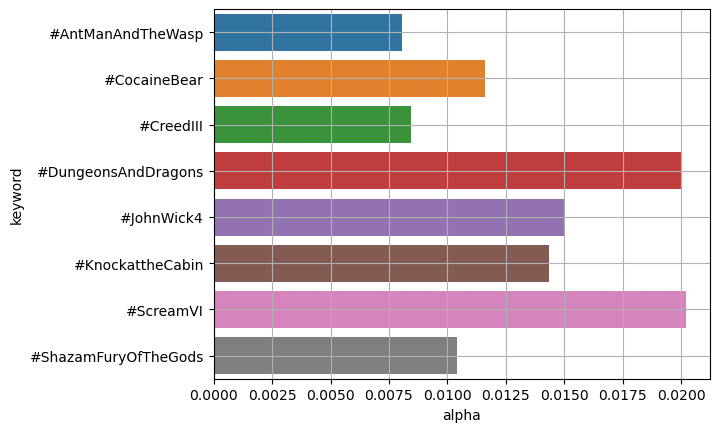

In [5]:
sns.barplot(data = df_alpha, y = 'keyword', x = 'alpha')
plt.grid()
plt.show()

# Plot Interaction Strengths (Beta)

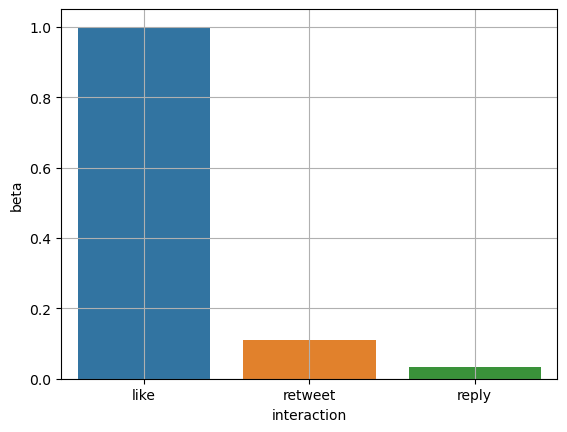

In [6]:
sns.barplot(data = df_beta, x = 'interaction', y = 'beta')
plt.grid()
plt.show()

In [8]:
df.groupby(by = 'keyword').sum()

C:\Users\trz2\AppData\Local\Temp\ipykernel_25200\959201683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = 'keyword').sum()


,retweet_count,reply_count,like_count,quote_count,impression_count,keyword_#AntManAndTheWasp,keyword_#JohnWick4,keyword_#ShazamFuryOfTheGods,keyword_#DungeonsAndDragons,keyword_#CreedIII,keyword_#ScreamVI,keyword_#KnockattheCabin,keyword_#CocaineBear,like_engagement,retweet_engagement,reply_engagement
keyword,,,,,,,,,,,,,,,,
#AntManAndTheWasp,970,489,9641,176,1207398,1075,0,0,0,0,0,0,0,5.272488,1.679895,1.595306
#CocaineBear,2597,975,34039,581,2843780,28,3,5,0,26,9,3,1110,10.753652,1.449783,1.754468
#CreedIII,1889,686,13282,489,1643196,13,2,4,0,1051,0,0,0,10.089842,3.444247,1.114971
#DungeonsAndDragons,2199,642,14472,115,758374,1,8,3,1007,0,0,0,0,33.524984,7.068852,4.131015
#JohnWick4,3381,1037,27730,583,1874276,6,1090,0,0,0,0,0,0,15.860844,2.361157,3.402999
#KnockattheCabin,21,9,115,0,8862,0,0,0,0,0,0,1000,0,56.059915,10.005310,2.018605
#ScreamVI,9952,1859,93675,1020,4574141,0,9,7,4,15,1086,0,0,12.039515,0.904076,1.389995
#ShazamFuryOfTheGods,1656,929,14628,226,1449678,3,8,1124,0,0,0,0,0,27.624976,12.369882,5.038791
